#Eccentricity Damping & Migration

The reboundxf (xf = eXtra Forces) allows you to easily add additional forces to N-body integrations.  We begin by importing both the rebound and reboundxf modules.

In [1]:
import rebound
import reboundxf
import numpy as np

Now let's set the integrator to IAS15, G to $4\pi^2$ (so units are in AU, $M_\odot$, and years), and the time of the integration to $10^4$ years.  Then let's add two planets on initially eccentric orbits, and move to the center of mass frame.

In [2]:
rebound.integrator = "ias15"
rebound.G = 4*np.pi**2
tmax = 1.e4 # years

rebound.add(m=1.)
rebound.add(m=1e-6,a=1.,e=0.1)
rebound.add(m=1e-6,a=10.,e=0.1)
rebound.move_to_com() # Moves to the center of momentum frame

Now comes the step of connecting the reboundxf forces to rebound, and setting the damping/migration parameters.

In [3]:
rebound.additional_forces = reboundxf.forces()
reboundxf.set_e_damping([0.,tmax/10.,tmax])
reboundxf.set_migration([0.,0.,tmax])

The first line is always required to tell rebound to use reboundxf for additional forces.  Eccentricity damping and migration are implemented as forces that lead to an orbit-averaged exponential decay 
\begin{equation}
a = a_0e^{-t/\tau_a},\:\:\:e = e_0e^{-t/\tau_e}
\end{equation}
In general, each body will have different damping timescales.  To implement, simply call the above setter functions with a list containing the e-damping (or migration) timescales for each of the bodies, in the same order they were added to the simulation.

**Important:** Currently you must only set damping timescales **AFTER** all the particles have been added to the simulation, and this implementation does not support adding or removing particles in the middle of the simulation (e.g. during collisions or particles leaving the box)

Now let's integrate, and keep track of the two planets' eccentricities and semimajor axes to test this.

In [4]:
Nout = 1000
e1,e2,a1,a2 = np.zeros(Nout), np.zeros(Nout), np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0.,tmax,Nout)
for i,time in enumerate(times):
    rebound.integrate(time)
    orbits = rebound.calculate_orbits() # returns an array of orbits, where the 0 element is the first *PLANET*
    e1[i] = orbits[0].e
    e2[i] = orbits[1].e
    a1[i] = orbits[0].a
    a2[i] = orbits[1].a

Now let's plot it on a linear-log scale to check whether we get the expected exponential behavior.

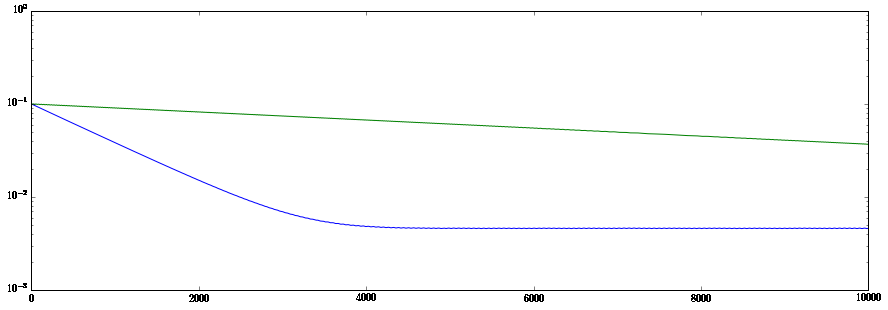

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
plt.plot(times,e1)
plt.plot(times,e2)

Hm...I'm looking into this behavior.  Plotting the semimajor axes,

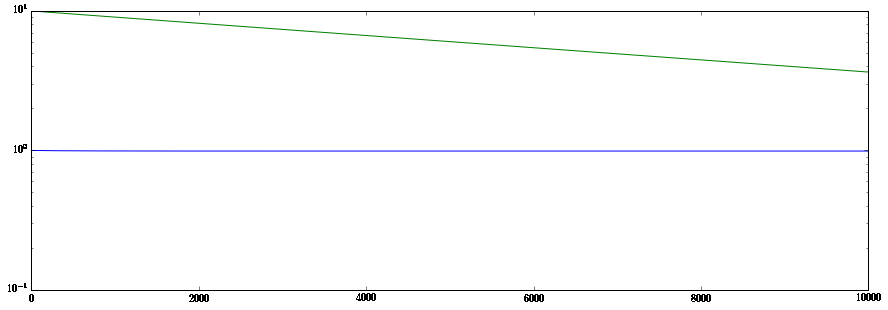

In [6]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.set_yscale('log')
plt.plot(times,a1)
plt.plot(times,a2)